I need to work out how much DV is saved by gravity assists on the way into the Jovian system.
I could make a proper gravity assist helper. That seems tough. 
### Ideas for proper gravity assist calculator
The first test will be how effective this plotter is at predicting the Jupiter-Saturn gravity assists taken by Pioneer and Voyager.\\
\\
A naive idea is to take some number (maybe as low as 10) different trajectories through the Jupiter system, and propagate them to see how close they get to Saturn

In [1]:
from astropy import units as u
from astropy import time
import astropy
import numpy as np

from poliastro import iod
from poliastro.bodies import Body,Mars, Earth, Venus, Jupiter, Saturn, Uranus, Neptune, Sun, Europa, Ganymede, Callisto, Io, Titan
from poliastro.ephem import Ephem
from poliastro.maneuver import Maneuver
from poliastro.twobody import Orbit
from poliastro.util import time_range
from poliastro.plotting import OrbitPlotter3D, StaticOrbitPlotter
import math
import matplotlib.pyplot as plt
# More info: https://plotly.com/python/renderers/
import plotly.io as pio
from poliastro.util import norm, time_range
pio.renderers.default = "plotly_mimetype+notebook_connected"

from astropy.coordinates import solar_system_ephemeris


solar_system_ephemeris.set("jpl")

<ScienceState solar_system_ephemeris: 'jpl'>

Test code for Jovian system 

/home/jack/Documents/miniforge3-n/envs/cleanastronomy/lib/python3.10/site-packages/erfa/core.py:133: ErfaWarning:

ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"

/home/jack/Documents/miniforge3-n/envs/cleanastronomy/lib/python3.10/site-packages/erfa/core.py:133: ErfaWarning:

ERFA function "utctai" yielded 1 of "dubious year (Note 3)"

/home/jack/Documents/miniforge3-n/envs/cleanastronomy/lib/python3.10/site-packages/erfa/core.py:133: ErfaWarning:

ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"



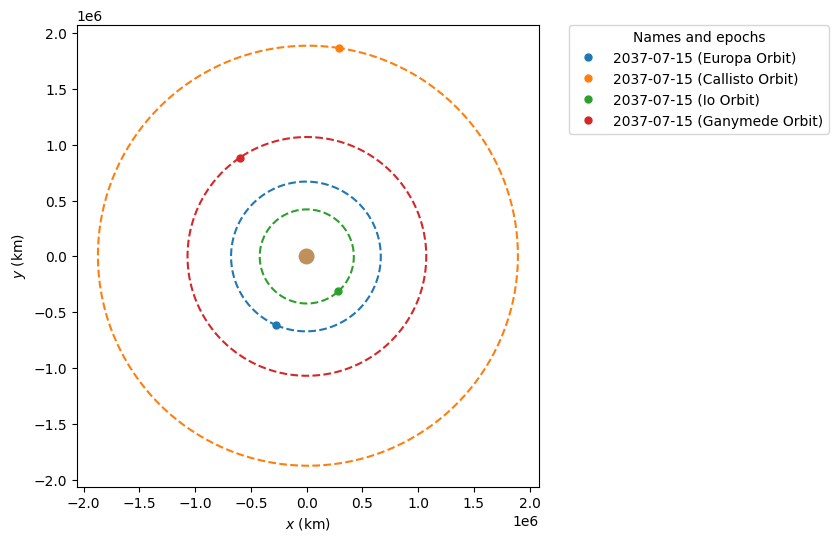

In [ ]:
start_date = time.Time("2037-07-15 01:01", scale="utc").tdb
end_date = time.Time("2037-07-25 01:01", scale="utc").tdb

body1=Europa
plotter = StaticOrbitPlotter()

epoch=time_range(start=start_date, end=end_date)
io_ephem = Ephem.from_horizons(501,epochs= epoch, attractor= Jupiter)#Io is 501
ganymede_ephem = Ephem.from_horizons(503,epochs= epoch, attractor= Jupiter)#Ganymede is 503
europa_ephem = Ephem.from_horizons(502,epochs= epoch, attractor= Jupiter)#Europa is 592
callisto_ephem = Ephem.from_horizons(504,epochs= epoch, attractor= Jupiter)
# print(ephem)
orb_europa = Orbit.from_ephem(Jupiter, europa_ephem, start_date)
orb_callisto = Orbit.from_ephem(Jupiter, callisto_ephem, start_date)
orb_io = Orbit.from_ephem(Jupiter, io_ephem, start_date)
orb_ganymede = Orbit.from_ephem(Jupiter, ganymede_ephem, start_date)
# orb=Orbit.circular(Europa, alt=200*u.km)
# plotter.plot(orb, label="200km LEO")
# plotter.plot_body_orbit(body1, epoch =epoch, label=body1)

plotter.plot(orb_europa, label="Europa Orbit")
plotter.plot(orb_callisto, label="Callisto Orbit")
plotter.plot(orb_io, label="Io Orbit")
plotter.plot(orb_ganymede, label="Ganymede Orbit")
# plotter.plot_ephem(ephem, label="Europa Orbit")






In [ ]:
#for a lighter project, all i need to do is calculate